**Descargar Librerias Necesarias**

In [1]:
import sys
print(sys.executable)

!"{sys.executable}" -m ensurepip --default-pip
!"{sys.executable}" -m pip install pandas matplotlib numpy jinja2

c:\Users\vento\AppData\Local\Programs\Python\Python313\python.exe
Looking in links: c:\Users\vento\AppData\Local\Temp\tmpx4hwi0t4


In [2]:
import numpy as np
import Tools as tools
import pandas as pd
import matplotlib.pyplot as plt


**Definir Constantes**

In [3]:
# Constantes del problema
g = 32        # gravedad (ft/s^2)
r1 = 0.15         # resistencia antes de abrir paracaídas
r2 = 1.5          # resistencia después
tp = 20           # tiempo de apertura del paracaídas
x0 = 10000        # altura inicial
v0 = 0            # velocidad inicial

**Obtener Grafica de Velocidad en funcion del tiempo**

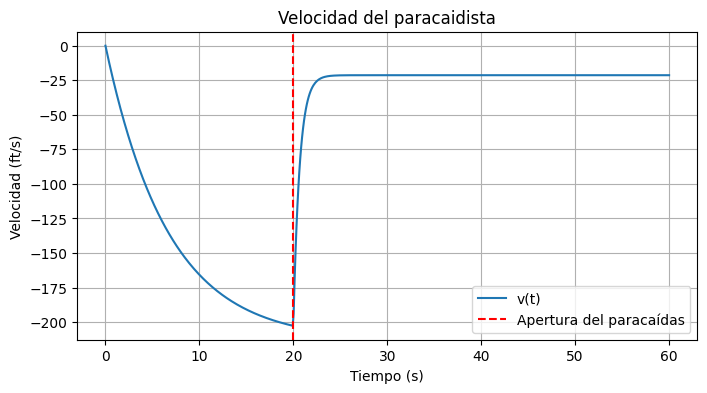

In [4]:
# Graficar velocidad desde t=0 hasta t=60s

T = np.linspace(0, 60, 600)
V = [tools.Velocidad(t, 0, 0, tp) for t in T]

plt.figure(figsize=(8,4))
plt.plot(T, V, label="v(t)")
plt.axvline(tp, color="red", linestyle="--", label="Apertura del paracaídas")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (ft/s)")
plt.title("Velocidad del paracaidista")
plt.grid()
plt.legend()
plt.show()

**Obtener Grafica de Distancia en Funcion del Tiempo**

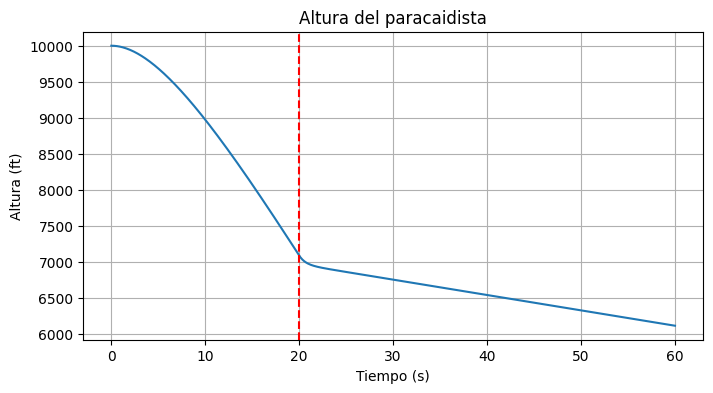

In [5]:
# Graficar distancia

X = [tools.Distancia(t, x0, v0, tp) for t in T]

plt.figure(figsize=(8,4))
plt.plot(T, X)
plt.axvline(tp, color="red", linestyle="--")
plt.xlabel("Tiempo (s)")
plt.ylabel("Altura (ft)")
plt.title("Altura del paracaidista")
plt.grid()
plt.show()

**Graficar Isoclina de la derivada de la Velocidad**

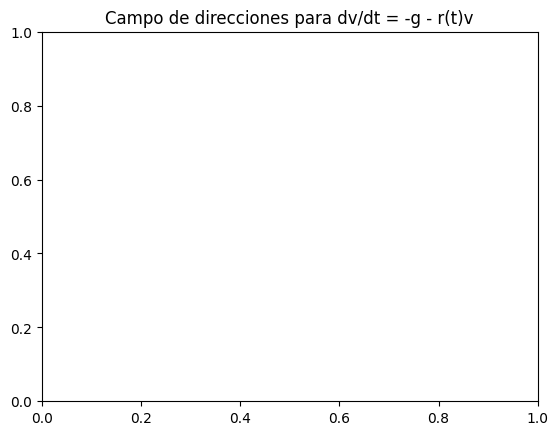

In [6]:
# Usar tu función Graf_Isoclina para representar la isoclina

tools.Graf_Isoclina(
    XLeftrg=0,
    XRightrg=50,
    YDownrg=-230,
    YUprg=0,
    F=tools.Der_Velocidad,
    seg=5,
    fsize=(10,6),
    SeeVectors=True,
    SeeLines=False
)
plt.title("Campo de direcciones para dv/dt = -g - r(t)v")
plt.show()

**Graficar la funcion de velocidad por medio de su derivada con el metodo de Runge-Kutta 4
con pasos de 0.1**

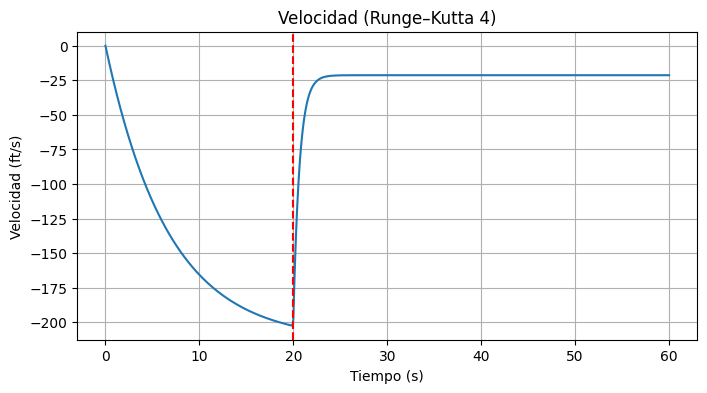

In [7]:
# Resolver la EDO dv/dt = -g - r v usando tu método RK4

Deriv = lambda t, v: tools.Der_Velocidad(t, v)

T_RK, V_RK = tools.RungeKutta4(0, 60, 0, Deriv, intervals=0.1)

plt.figure(figsize=(8,4))
plt.plot(T_RK, V_RK)
plt.axvline(tp, color="red", linestyle="--")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (ft/s)")
plt.title("Velocidad (Runge–Kutta 4)")
plt.grid()
plt.show()

**Analisar diferencias entre la aproximacion de Runge-Kutta 4 y la solucion analitica**

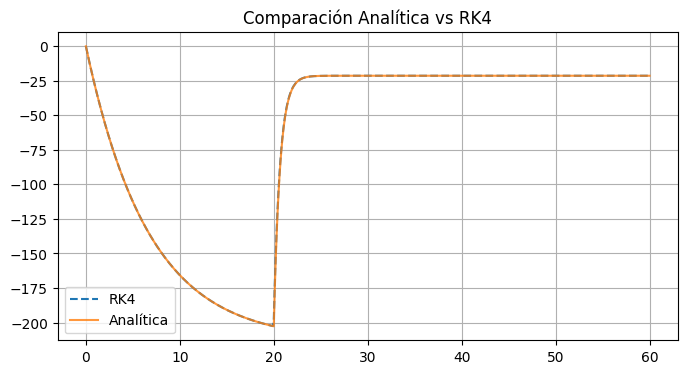

In [8]:
V_exact = [tools.Velocidad(t, 0, 0, tp) for t in T_RK]

plt.figure(figsize=(8,4))
plt.plot(T_RK, V_RK, label="RK4", linestyle="--")
plt.plot(T_RK, V_exact, label="Analítica", alpha=0.8)
plt.legend()
plt.grid()
plt.title("Comparación Analítica vs RK4")
plt.show()

**Código para comparar algoritmos numéricos**

*Crear tabla de analisis del Metodo de Newton*

In [9]:
import pandas as pd
import Tools
import numpy as np

# --- WRAPPERS necesarios, porque Tools espera funciones de un solo parámetro ---
def F(t):
    return Tools.Distancia(t)

def dF(t):
    return Tools.Velocidad(t)   # Tools.Velocidad ignora el segundo parámetro

# ------------------------------------------------------------------------------

def tabla_newton(x0, tol=1e-6, max_iter=20):

    datos = []
    t = x0

    for n in range(max_iter):

        ft = F(t)
        dft = dF(t)

        # evitar división por cero
        if abs(dft) < 1e-12:
            break

        # siguiente paso de Newton
        t_next = t - ft / dft
        error = abs(t_next - t)

        datos.append({
            "Iteración": n+1,
            "t_n": t,
            "F(t_n)": ft,
            "F'(t_n)": dft,
            "t_{n+1}": t_next,
            "Error": error
        })

        # criterio de parada
        if abs(ft) < tol or error < tol:
            break

        t = t_next

    return pd.DataFrame(datos)


*Crear tabla de analisis del metodo de Biseccion*

In [10]:
def tabla_biseccion(a, b, tol=1e-6, max_iter=40):

    datos = []
    fa = F(a)
    fb = F(b)

    if np.sign(fa) == np.sign(fb):
        raise ValueError("El intervalo no contiene un cambio de signo.")

    for n in range(max_iter):

        m = (a + b) / 2
        fm = F(m)
        error = abs(b - a) / 2

        datos.append({
            "Iteración": n+1,
            "a": a,
            "b": b,
            "m": m,
            "F(m)": fm,
            "Error": error
        })

        if abs(fm) < tol or error < tol:
            break
        
        # Elegir el subintervalo correcto
        if np.sign(fm) == np.sign(fa):
            a = m
            fa = fm
        else:
            b = m
            fb = fm

    return pd.DataFrame(datos)

*Mostrar Tablas de Comparacion*

In [11]:
df_newton = tabla_newton(x0=20)
display(df_newton)

df_biseccion = tabla_biseccion(a=20, b=400)
display(df_biseccion)

,Iteración,t_n,F(t_n),F'(t_n),t_{n+1},Error
0,1,20.000000,7.084747e+03,-202.712092,54.949801,34.949801
1,2,54.949801,6.218232e+03,-21.333333,346.429443,291.479642
2,3,346.429443,-4.263256e-13,-21.333333,346.429443,0.000000


,Iteración,a,b,m,F(m),Error
0,1,20.000000,400.000000,210.000000,2.910495e+03,190.000000
1,2,210.000000,400.000000,305.000000,8.838281e+02,95.000000
2,3,305.000000,400.000000,352.500000,-1.295052e+02,47.500000
3,4,305.000000,352.500000,328.750000,3.771614e+02,23.750000
4,5,328.750000,352.500000,340.625000,1.238281e+02,11.875000
5,6,340.625000,352.500000,346.562500,-2.838559e+00,5.937500
6,7,340.625000,346.562500,343.593750,6.049477e+01,2.968750
7,8,343.593750,346.562500,345.078125,2.882811e+01,1.484375
8,9,345.078125,346.562500,345.820312,1.299477e+01,0.742188
9,10,345.820312,346.562500,346.191406,5.078108e+00,0.371094
